# EDA dataset TiendaNube

Esta notebook ofrece un análisis de la distribución de los datos almacenados en el dataset (*Exploratory Data Analysis*). El objetvio es poder determinar con qué tipos de variables cuenta el dataset (numéricas o categóricas) y ver la distribución de los mismos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura de datos

In [2]:
df_data = pd.read_csv('test_data.csv', delimiter=';', index_col=0)
df_data.head()

,id,country,creation_platform,admin_visits,intercom_conversations,source_pulido,creation_weekday,creation_hour,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,target
0,589015,BR,mobile_app,1.0,0.0,Other,6,3,2.0,1,0.0,215.0,6.0,0.0,0
1,589016,BR,mobile_web,2.0,0.0,Google CPC no Brand,6,3,1.0,1,0.0,0.0,44.0,0.0,0
2,589017,BR,mobile_web,1.0,0.0,Google CPC no Brand,6,3,0.0,0,0.0,0.0,16.0,0.0,0
3,589018,BR,mobile_web,1.0,0.0,Google CPC no Brand,6,3,0.0,0,0.0,0.0,15.0,0.0,0
4,589019,BR,mobile_web,1.0,0.0,Google CPC no Brand,6,3,0.0,0,0.0,0.0,24.0,0.0,0


In [3]:
df_data.shape

(585340, 15)

**Chequeo de tipos de datos y nulidad**

In [4]:
# Tipos de datos 
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585340 entries, 0 to 585339
Data columns (total 15 columns):
id                            585340 non-null int64
country                       585340 non-null object
creation_platform             585340 non-null object
admin_visits                  585340 non-null float64
intercom_conversations        585340 non-null float64
source_pulido                 585340 non-null object
creation_weekday              585340 non-null int64
creation_hour                 585340 non-null int64
products_with_description     585340 non-null float64
total_products_with_images    585340 non-null int64
total_product_categories      585340 non-null float64
total_events_on_Android       585340 non-null float64
total_events_on_Web           585340 non-null float64
total_events_on_iOS           585340 non-null float64
target                        585340 non-null int64
dtypes: float64(7), int64(5), object(3)
memory usage: 71.5+ MB


In [5]:
# Chequeo de NaN
df_data.isna().any()

id                            False
country                       False
creation_platform             False
admin_visits                  False
intercom_conversations        False
source_pulido                 False
creation_weekday              False
creation_hour                 False
products_with_description     False
total_products_with_images    False
total_product_categories      False
total_events_on_Android       False
total_events_on_Web           False
total_events_on_iOS           False
target                        False
dtype: bool

In [6]:
df_data.describe()

,id,admin_visits,intercom_conversations,creation_weekday,creation_hour,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,target
count,5.853400e+05,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000
mean,8.849227e+05,1.091154,0.005793,2.725496,13.565886,5.232655,5.198054,1.289987,7.105310,68.441636,0.895406,0.080071
std,1.711352e+05,0.543782,0.118485,1.937653,7.157861,104.301081,97.490506,9.712947,36.444225,124.612021,12.274338,0.271404
min,5.890150e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.365218e+05,1.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000
50%,8.847855e+05,1.000000,0.000000,3.000000,15.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000
75%,1.032991e+06,1.000000,0.000000,4.000000,19.000000,1.000000,1.000000,0.000000,0.000000,70.000000,0.000000,0.000000
max,1.181809e+06,22.000000,27.000000,6.000000,23.000000,28530.000000,28530.000000,3059.000000,1706.000000,14596.000000,2527.000000,1.000000


Se puede observar que hay un conjunto de variables cuya media coincide con el percentil 50% (**admin_visits**, **creation_weekday**, **creation_hour**).

Hay otro conjunto de variables cuyo valor del percentil 75% está muy lejos del valor máximo, lo que indica, que hay valores *outliers* para esas variables (**admin_visits**, **intercom_conversations**, **products_with_description**, **total_products_with_images**, **total_product_categories**, **total_events_on_Android**, **total_events_on_Web**, **total_events_on_iOS**)

In [8]:
df_data['total_events_on_Web'].quantile(0.999)

1071.66100000008

## Limpieza de outliers

Para eliminar los outliers, se definen los valores mínimos y máximos validos para la variable utilizando los cuartiles

In [9]:
def clean_outliers_with_quartiles(df_sample, col):
    
    #Dropping the outlier rows with Percentiles of a column
    upper_lim = df_sample[col].quantile(0.999)

    df_sample = df_sample[(df_sample[col] < upper_lim)]
    
    return df_sample
    

In [10]:
columns_to_drop_outliers = [ 
    'products_with_description', 
    'total_products_with_images', 
    'total_product_categories',
    'total_events_on_Android',
    'total_events_on_Web',
    'total_events_on_iOS'
]

In [11]:
for col in columns_to_drop_outliers[1:2]:
    df_data = clean_outliers_with_quartiles(df_data, 'total_events_on_Web') 

In [12]:
df_data.describe()

,id,admin_visits,intercom_conversations,creation_weekday,creation_hour,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,target
count,5.847540e+05,584754.000000,584754.000000,584754.000000,584754.000000,584754.000000,584754.000000,584754.000000,584754.000000,584754.000000,584754.000000,584754.000000
mean,8.848483e+05,1.090260,0.005700,2.725509,13.565188,4.924443,5.029358,1.236337,7.097316,66.830183,0.890893,0.079551
std,1.711474e+05,0.543107,0.113613,1.937634,7.158185,99.892654,95.091803,7.828755,36.409967,107.757332,12.229170,0.270598
min,5.890150e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.364202e+05,1.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000
50%,8.846645e+05,1.000000,0.000000,3.000000,15.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000
75%,1.032924e+06,1.000000,0.000000,4.000000,19.000000,1.000000,1.000000,0.000000,0.000000,70.000000,0.000000,0.000000
max,1.181809e+06,22.000000,27.000000,6.000000,23.000000,28530.000000,28530.000000,2562.000000,1706.000000,1071.000000,2527.000000,1.000000


In [ ]:
df_data.shape

## Análisis de los datos

**Distribución de la etiqueta target**

Aquí se puede observar la cantidad casos en los que el *trial* se convirtió en *payment*· El valor 0 indica que no lo hizo y el 1 que sí. Como se observa en el gráfico, el dataset se encuentra desbalanceado en favor del valor 0.

In [13]:
df_data.target.value_counts()

0    538236
1     46518
Name: target, dtype: int64

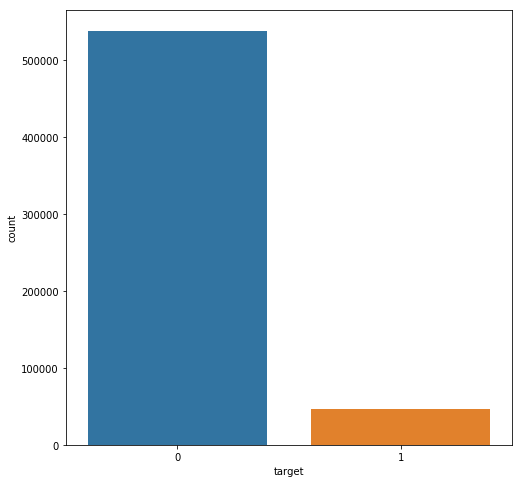

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(x='target', data=df_data)

Con el fin de agilizar el procesamiento para los gráficos, se toma una muestra representativa del dataset

In [15]:
df_sample = df_data.sample(frac=0.1)
df_sample.shape

(58475, 15)

### Variables numéricas

En base al diccionario de datos, podemos clasificar a las siguiente variables como numéricas:

* **total_events_on_iOS**: registro de la cantidad de eventos que tuvo el trial por un dispositivo con sistema operativo Android
* **total_events_on_Web**: registro de la cantidad de eventos que tuvo el trial por una computadora
* **total_events_on_Android**: registro de la cantidad de eventos que tuvo el trial por un dispositivo con sistema operativo iOS
* **admin_visits**: cantidad de visitas que registró el administrador 
* **intercom_conversations**: cantidad de conversaciones que registró la tienda con el equipo de soporte
* **products_with_description**: cantidad de productos que poseen descripción 
* **total_products_with_images**: cantidad de productos que poseen imagen
* **total_product_categories**: cantidad de categorías de productos creadas

**Distribución de las variables tomadas de a pares**

A continuación se analiza como se distribuyen las variables numéricas, tomándolas de a pares.

Primero se analizó qué tipo de relación había entre los eventos registrados por los diversos tipos de dispositivos. Para ello se observaron las siguiente variables:

* **total_events_on_iOS**
* **total_events_on_Web**
* **total_events_on_Android**

Como podemos observar en el gráfico, los usuarios realizan acciones de manera combinada tanto de un dispositivo móvil (Android o iOS) como desde la Web. 

También resulta interesante observar la distribución dividida por clases para cada dispositivo: en el caso de los usuarios que usaron iOS o Web podemos observar la curva de la clase positiva posee un desvío a la derecha; y además, un pico "más alto" respecto de la clase negativa. Esto puede ser un indicio de la importancia que estas variables tendrán para el **clasificador**

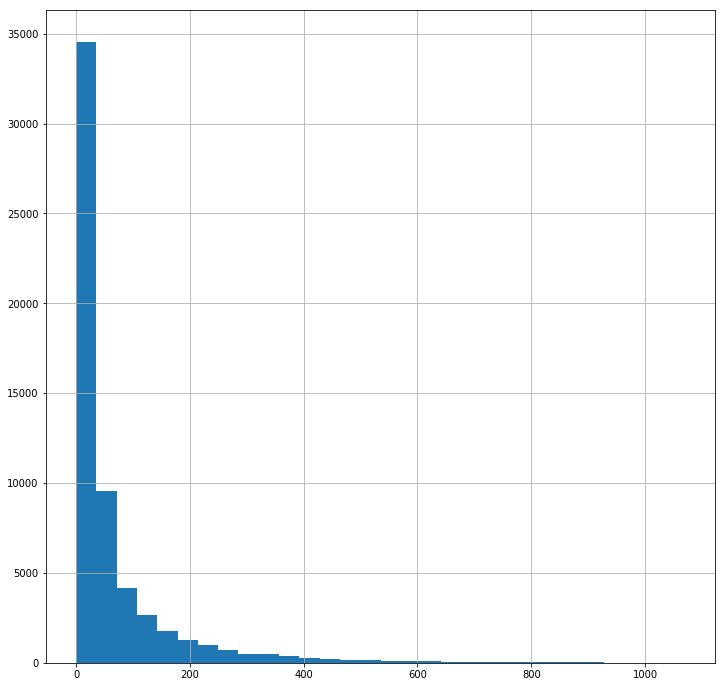

In [16]:
plt.figure(figsize=(12,12))

df_sample['total_events_on_Web'].hist(bins=30)

In [ ]:
plt.figure(figsize=(12,12))

sns.pairplot(df_sample[['total_events_on_iOS', 'total_events_on_Web', 'total_events_on_Android', 'target']], plot_kws={'alpha': 0.3}, hue='target')

Dado que se tratan de distribuciones con desvíos a la derecha se realiza una transformación logartimica para obtener una distribución que se acerque más a la estandar

In [ ]:
df_sample['total_events_on_iOS'] = np.log((1+ df_sample['total_events_on_iOS']))
df_sample['total_events_on_Web'] = np.log((1+ df_sample['total_events_on_Web']))
df_sample['total_events_on_Android'] = np.log((1+ df_sample['total_events_on_Android']))

In [ ]:
plt.figure(figsize=(12,12))

sns.pairplot(df_sample[['total_events_on_iOS', 'total_events_on_Web', 'total_events_on_Android', 'target']], plot_kws={'alpha': 0.3}, hue='target')

Aquí se muestran las relaciones entre las variables que se corresponden con los eventos registrados con un tipo de dispositivo y las siguientes variables:

* **admin_visits**
* **intercom_conversations**
* **products_with_description** 
* **total_products_with_images**
* **total_product_categories**

En este resulta interesante observar los picos de las curvas para las diferentes variables. Al igual que las anteriores, la mayoría de las variables muestran curvas con desvíos a la derecha, mostrando la curva de la clase positiva un pico "más alto". La única variable que difiere es la variable **admin_visits** que muestra dos picos y, a diferencia de las otras, los picos "más altos" corresponden a la clase negativa.

En cuanto a las relaciones entre las variable, a priori no se observa una relación que muestre una separación de las clases.

In [ ]:
plt.figure(figsize=(12,12))

sns.pairplot(df_sample[['admin_visits', 'intercom_conversations','products_with_description', 'total_products_with_images', 'total_product_categories', 'total_events_on_Android', 'target']], plot_kws={'alpha': 0.3}, hue='target')

In [ ]:
df_sample['products_with_description'] = np.log((1+ df_sample['products_with_description']))
df_sample['total_product_categories'] = np.log((1+ df_sample['total_product_categories']))
df_sample['total_products_with_images'] = np.log((1+ df_sample['total_products_with_images']))

In [ ]:
plt.figure(figsize=(12,12))

sns.pairplot(df_sample[['admin_visits', 'intercom_conversations','products_with_description', 'total_products_with_images', 'total_product_categories', 'total_events_on_Web', 'target']], plot_kws={'alpha': 0.3}, hue='target')

In [ ]:
plt.figure(figsize=(12,12))

sns.pairplot(df_sample[['admin_visits', 'intercom_conversations','products_with_description', 'total_products_with_images', 'total_product_categories', 'total_events_on_iOS', 'target']], plot_kws={'alpha': 0.3}, hue='target')

### Variables categoricas

Posteriormente se analizaron las distribuciones de las variables categóricas:

* **country**: país de origen del trial
* **creation_platform**: plataforma por la cual se creó la tienda 
* **source_pulido**: origen de la tienda por campaña de marketing
* **creation_weekday**: día de la semana en que se creó la tienda

Para un análisis más claro se discriminan las distribuciones de acuerdo a las clases. Aquí resulta interesante observar que si bien en Brasil el producto es mucho más utilizado, la relación entre los usuarios que pasan a ser *payment* y los que no lo hacen es "peor" que en Argentina, donde la cantidad de usuarios que pasaron a ser *payment* es similar a la de Brasil. 

También hay que destacar que la variable **creation_platform** muestra que la mayor cantidad de clase *payment* se da entre aquellos usuarios que los crearon a través del *desktop*.

Finalmente, en la variable **source_pulido** las categorías *Brand* y *Google Organic* ofrecen la "mejor" relación entre las clases; mientras que la variable **creation_weekday** parece mostrar una relación uniforme entre las clases, en otras palabras el día creación parecería no ser un factor a que ayude a predecir si el usuario se pasará a *payment* o no.

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='country', hue='target', data=df_sample)

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='creation_platform', hue= 'target', data=df_sample)

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='source_pulido', hue= 'target', data=df_sample)
ax.set_xticklabels(df_sample['source_pulido'].unique() ,rotation=80, fontsize=14)

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='creation_weekday', hue= 'target', data=df_sample)

In [ ]:
plt.figure(figsize=(8,8))
sns.catplot(x='country', hue='creation_platform', col='target', data=df_sample, kind="count")

### Segmentación de los eventos de acuerdo a los cuartiles

In [18]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df_sample['total_events_on_Web'].quantile(quantile_list)
quantiles

0.00       0.0
0.25      11.0
0.50      27.0
0.75      70.0
1.00    1070.0
Name: total_events_on_Web, dtype: float64

In [19]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
df_sample['total_events_on_Web_qrange'] = pd.qcut(df_sample['total_events_on_Web'], q=quantile_list)
df_sample['total_events_on_Web_qlabel'] = pd.qcut(df_sample['total_events_on_Web'], q=quantile_list, labels=quantile_labels)

df_sample.head()

,id,country,creation_platform,admin_visits,intercom_conversations,source_pulido,creation_weekday,creation_hour,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,target,total_events_on_Web_qrange,total_events_on_Web_qlabel
352075,944865,BR,mobile_app,1.0,0.0,Other,6,11,0.0,0,0.0,0.0,0.0,0.0,0,"(-0.001, 11.0]",0-25Q
22625,611816,AR,mobile_app,1.0,0.0,Other,6,13,0.0,0,0.0,7.0,1.0,0.0,0,"(-0.001, 11.0]",0-25Q
386505,979697,BR,desktop,1.0,0.0,Direct,3,0,0.0,3,1.0,0.0,233.0,0.0,0,"(70.0, 1070.0]",75-100Q
33786,623071,AR,desktop,1.0,0.0,Facebook CPC,6,14,0.0,0,0.0,0.0,24.0,0.0,0,"(11.0, 27.0]",25-50Q
296200,888365,BR,mobile_web,1.0,0.0,Google CPC no Brand,2,3,0.0,0,0.0,0.0,7.0,0.0,0,"(-0.001, 11.0]",0-25Q


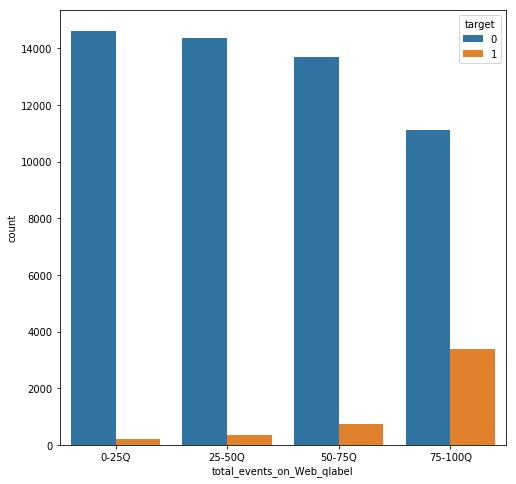

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(x='total_events_on_Web_qlabel', hue= 'target', data=df_sample)